In [1]:
# auto correlation: which means it includes indirect relation also.
# partial auto correlation: 155min pe itna temperature hai.
#     so in python we use partial bcoz hm dusre kis factor pe nhi ja rhe hai.

In [3]:
#### Interview questions

# we will go to the PACF not go to the ACF
# bcoz isme hm past wale ka correlation check kr rhe hai.

# for more search on gpt or ask from mam

In [4]:
# ADF test,
# what is ACF 
# what is PACF

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates=['Date'], index_col='Date')

In [7]:
X=df.values
print('Shape of data /t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data /t (3650, 1)
Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperatures:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

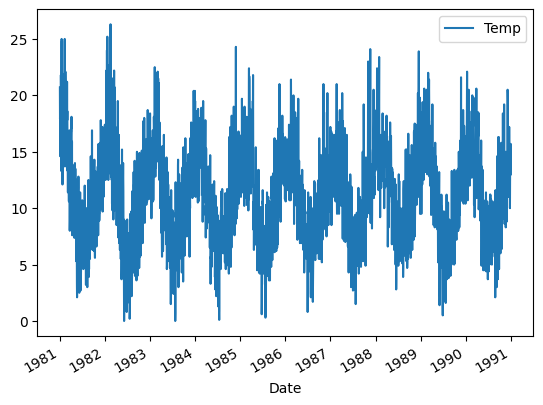

In [8]:
df.plot()

<Axes: xlabel='Date'>

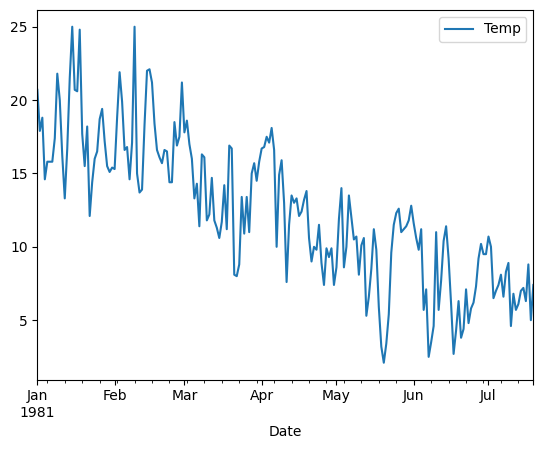

In [9]:
df[:200].plot()

In [10]:
# No evident 

# ADF Test

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Usd for ADF Regression andd critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -4.444804924611693
2. P-Value : 0.000247082630036105
3. Num Of Lags :  20
4. Num Of Observations Usd for ADF Regression andd critical values Calculation :  3629
5. Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


In [12]:
# p-value = 0.000247 hai, jo 0.05 se chhoti hai. Matlab, hum null hypothesis (H₀) ko reject kar sakte hain.

# Interpretation
# ✅ Null Hypothesis (H₀): Time series me unit root hai → Non-Stationary hai.
# ✅ Alternative Hypothesis (H₁): Time series me unit root nahi hai → Stationary hai.

# Kyuki p-value < 0.05, iska matlab series stationary hai 🚀.

In [13]:
# it is not mandatory to find all.
# we can only check by using p value

In [14]:
# // important: stationary means constant mean and variance 

In [15]:
## 1. Persistence Model (Naive Forecast)


# The simplest time series method.
# assuems that the next value in the time seeries is equal to the last observed value.

In [16]:
# random walk me hme ek age ka value pta hota hai.
# noise walk me hme kuch bhi pta ni hota.
# wer can't predict anything..

In [17]:
# 2. AR

# A statistical model that predicts future values using past values with a weighted combinatioin of previous time steps.

# uses lagged observations as predictors.

# here we have given the window. like window 2, window 3.


# Example stock past 3 days.

In [18]:
# # when to use which model


# persistance highly stable
# ar -> strong correlation of present data to the past.
# ex: t has strong correlattion to the t-1.


# persistance and ar both are correlatioin
# and ye acf and pcf se find krte hai.

In [19]:
# acf depends on direct and indirect factors also.

# t ki values t pe bhi depend ahi.
# and previous lags pe bhi.
# yt-1, yt-2 is lag 2

In [20]:
# pacf


# meansures correaltioin between time sereis and a specific lag after removing the influence of specific lags.

# means t jo hai wo yt-1 PE BHI DEPEND HO SKTA HAI

# YA PHIR YT-3 PE BHI. AND BICH KI VALUES PE NI.
# if is used to find ar model order.

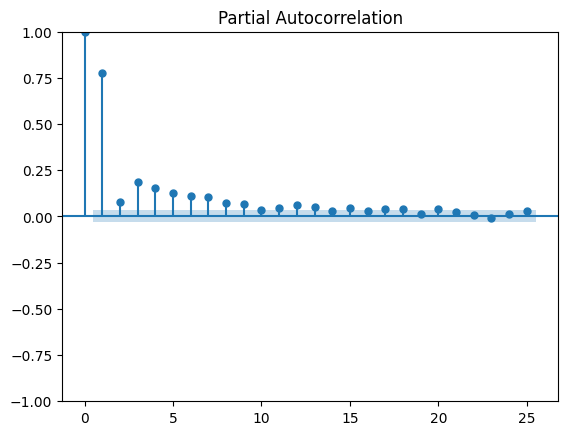

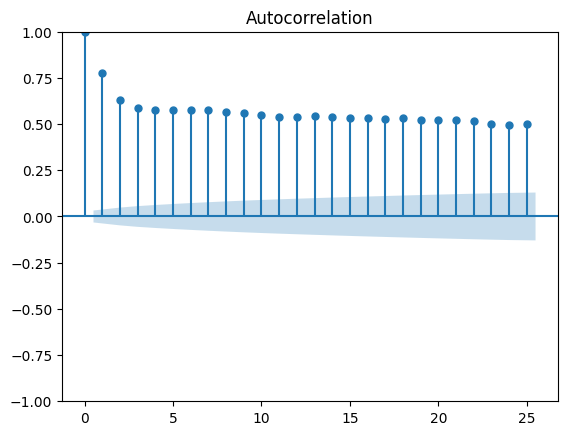

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['Temp'],lags=25)
acf=plot_acf(df['Temp'],lags=25)

In [22]:
# Partial correlation measures the direct relationship between two variables while controlling 
# for the effect of other variables, whereas autocorrelation measures 
# the correlation of a variable with its past values over time.

In [23]:
# fpacf p
# acf = q

In [24]:
# pacf => ma
# acf => ar

## Split Dataset into Train and Test Testing: Last 7 days

In [25]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [26]:
model=AutoReg(train,lags=10)

In [27]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 19 Mar 2025   AIC                          16775.028
Time:                        15:29:04   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [28]:
# 0.05 < lag value 
# then significant

In [29]:
print(len(train))

3643


In [30]:
print(len(test))

7


## Make Predictioned on Test Set and Compare

In [31]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [32]:
print(len(pred))

7


In [33]:
print(len(test))

7


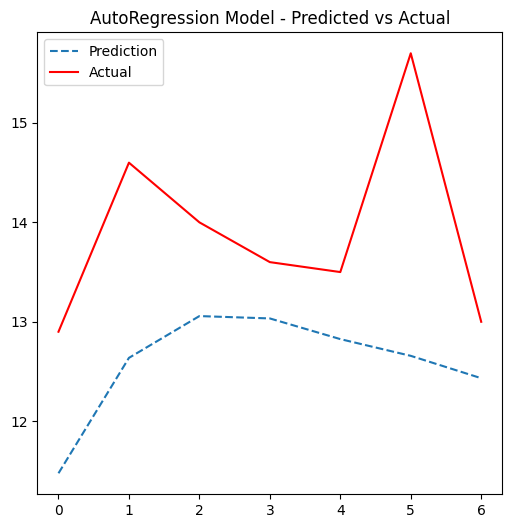

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


In [34]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(6,6))
plt.plot(pred, label='Prediction', linestyle='dashed')
plt.plot(test, label='Actual', linestyle='solid', color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show() 

# Print predicted values
print(pred)

In [35]:
# //
print(pred)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


In [36]:
# //
print(test)

[[12.9]
 [14.6]
 [14. ]
 [13.6]
 [13.5]
 [15.7]
 [13. ]]


### Calcualte Error

In [37]:
# // mycode
 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

# Print error values
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 1.3111923340212548
MSE: 2.4455318104214663
RMSE: 1.5638196220860852


In [38]:
test.shape

(7, 1)

In [39]:
pred.shape

(7,)

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
rmse = np.sqrt(mean_squared_error(test, pred))

## Making Future Predictions

In [53]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))

The Future prediction for the next week
[12.36671014 12.28608804 12.20309536 12.24915916 12.30618875 12.31199689
 12.27225975]
Number of Prediction Made: 7


In [49]:
print('Number of Predictions Made:', len(pred_future))

Number of Predictions Made: 7


In [54]:
# dynamic=False When dynamic=False, the model uses actual past observations to make 
# each prediction. If dynamic=True, it would use its own previous predictions, which can 
# lead to more errors over time.

In [55]:
import pandas as pd

# Sample data
data = {'Values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Define window size
window_size = 3

# Calculate Moving Average
df['Moving_Avg'] = df['Values'].rolling(window=window_size).mean()

# Display the result
print(df)


   Values  Moving_Avg
0      10         NaN
1      20         NaN
2      30        20.0
3      40        30.0
4      50        40.0
5      60        50.0
6      70        60.0
7      80        70.0
8      90        80.0
9     100        90.0


In [56]:
# Key Differences:

# Feature	                AR Model	                              MA Model
# Uses	                    Past values	                              Past error terms
# Dependency	            Direct correlation with past values	      Random shocks affecting current value
# Common Application	    Stock prices, economic indicators	      Noise filtering, error correction
# Order Notation	        AR(p)	                                  MA(q)

[0.49671415 0.35844985 1.00613839 2.52916825 2.29501487 2.06087791
 3.64009073 4.40752546 3.93805107 4.48061112]


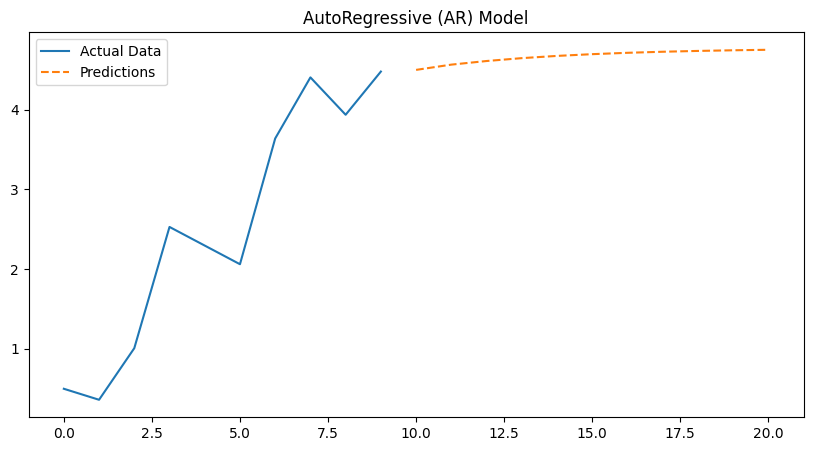

In [63]:
# AR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate synthetic time series data
np.random.seed(42)
n = 10
data = np.cumsum(np.random.randn(n))  # Random walk data
print(data)
# Fit AR model
p = 2  # AR order
model = AutoReg(data, lags=p)
model_fit = model.fit()

# Predict
predictions = model_fit.predict(start=len(data), end=len(data) + 10)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual Data")
plt.plot(range(len(data), len(data) + len(predictions)), predictions, label="Predictions", linestyle="dashed")
plt.legend()
plt.title("AutoRegressive (AR) Model")
plt.show()


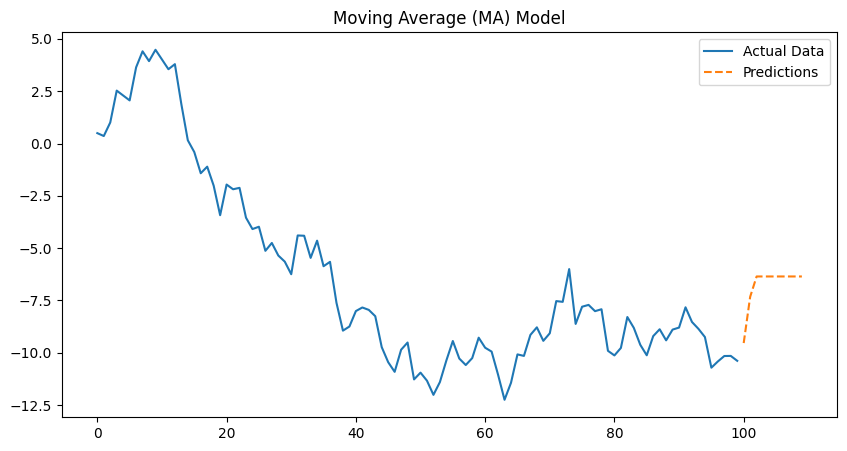

In [58]:
# MR

from statsmodels.tsa.arima.model import ARIMA

# Fit MA model (ARIMA with AR=0, MA=2)
q = 2  # MA order
model = ARIMA(data, order=(0, 0, q))
model_fit = model.fit()

# Predict
predictions = model_fit.forecast(steps=10)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual Data")
plt.plot(range(len(data), len(data) + len(predictions)), predictions, label="Predictions", linestyle="dashed")
plt.legend()
plt.title("Moving Average (MA) Model")
plt.show()


In [59]:
# Key Notes:
# AR Model: Uses past values (lags=p) to predict future values.
# MA Model: Uses past errors (q) to correct predictions.
# Libraries Used: statsmodels for modeling, matplotlib for visualization.
# Run these codes in a Python environment with the required libraries installed (pip install statsmodels matplotlib). 🚀

# Walk Forward Validation

In [ ]:
# HOMEWORD 
# READ AND UNDERSTAND